# Otimização poe Enxame de Partículas 
## *Função Rastrigin*

In [60]:
# Declarando Bibliotecas
import random
from itertools import combinations
import time
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.animation import FFMpegWriter


A função **Rastrigin** é dada definida sendo:


$$
f(\mathbf{x}) = An + \sum_{i=1}^{n} \left[ x_i^2 - A \cos(2\pi x_i) \right]

$$
where A = 10 and  x_i in [-5.12, 5.12] .

#### Gráfico da Função
![Function](Images/Rastrigin-Function-Figure-4-Ackley-Function.jpeg)

#### Valores de Y em função de X1 e X2
![Values](Images/valuesTable.png)

In [69]:
# Função Rastrigin
"""
x : array com os valores de x1 e x2
A: constante = 10
"""
def rastrigin(X, Y):
    A = 10
    return A * 2 + (X**2 - A * np.cos(2 * np.pi * X)) + (Y**2 - A * np.cos(2 * np.pi * Y))

### Parâmetros Globais

In [126]:
# Parâmetros globais
X_LIMIT = 5.12
POPULATION_SIZE= 30
NUM_ITERATIONS = 1000
DIMENSIONS = 2
STALL_LIMIT = 50
EPSILON = 1e-6
W_MIN = 0.4
W_MAX = 0.9
V_MAX = 0.5 * X_LIMIT
C_1 = 2
C_2 = 2

### Gerando a população inicial

Iremos gerar uma população inicial de tamanha POPULATION_SIZE. Cada indivíduo será um ponto no espaço 2D com valores (x1, x2) aleatórios, na faixa entre -5.12 <= x <= 5.12

In [89]:
# Função que gera a população incial

def generate_population():
    # Return an array with 2D elements
    return np.random.uniform(-1*X_LIMIT, X_LIMIT, (POPULATION_SIZE, DIMENSIONS))

In [90]:
# Célula para realização de testes
population = generate_population()

for i, individual in enumerate(population):
    print(f'Indivíduo {i + 1} : {individual}\n')

Indivíduo 1 : [ 2.88927026 -4.07615938]

Indivíduo 2 : [-3.90794907 -2.96863657]

Indivíduo 3 : [4.06452206 0.61641297]

Indivíduo 4 : [-2.17048007 -2.65773641]

Indivíduo 5 : [-1.6220461   1.41858965]

Indivíduo 6 : [-2.31743272  2.28771177]

Indivíduo 7 : [-3.55633813 -1.92934088]

Indivíduo 8 : [0.42754832 2.87270758]

Indivíduo 9 : [0.1979795  0.89290519]

Indivíduo 10 : [ 2.87237528 -0.67554475]

Indivíduo 11 : [-0.09740354 -3.02514417]

Indivíduo 12 : [-4.64284456  0.61036452]

Indivíduo 13 : [-0.9985406   1.00064617]

Indivíduo 14 : [-4.9613349  -3.40917411]

Indivíduo 15 : [ 2.95485778 -0.46085558]

Indivíduo 16 : [3.785008   3.11307675]

Indivíduo 17 : [ 0.92151902 -5.01173355]

Indivíduo 18 : [-0.7423466  -1.23249281]

Indivíduo 19 : [3.03111716 0.281946  ]

Indivíduo 20 : [0.98990611 4.82203728]

Indivíduo 21 : [ 4.74796215 -1.67378039]

Indivíduo 22 : [ 1.12967788 -4.9145566 ]

Indivíduo 23 : [-3.30542284 -4.15674406]

Indivíduo 24 : [ 0.59621116 -4.80465985]

Indivíduo 25 

### Avaliando o Fitness

Uma vez que a função Rastrigin procura o **mínimo** global, então podemos aplicar a sua função para cada partícula e inverter o valor encontrado em y

In [91]:
# Função para retornar a população com o fitness de cada indivíduo

def evaluate_fitness(particle):

    # Inverte o valor do encontrado
    X, Y = particle
    fitness = -1 * rastrigin(X, Y)

    # Retorna o valor de fitness encontrado
    return fitness
    

In [92]:
# Célula para a realização de testes

evaluated_individuals = []

for i, individual in enumerate(population):

    fitness = evaluate_fitness(individual)
    evaluated_individual = [individual, fitness]
    evaluated_individuals.append(evaluated_individual)
    print(f'Indivíduo {i + 1} : {individual}\nFitness = {fitness}\n')

Indivíduo 1 : [ 2.88927026 -4.07615938]
Fitness = -28.410375217168344

Indivíduo 2 : [-3.90794907 -2.96863657]
Fitness = -25.904877524032536

Indivíduo 3 : [4.06452206 0.61641297]
Fitness = -35.15297812280218

Indivíduo 4 : [-2.17048007 -2.65773641]
Fitness = -32.461271341432095

Indivíduo 5 : [-1.6220461   1.41858965]
Fitness = -40.56454342400138

Indivíduo 6 : [-2.31743272  2.28771177]
Fitness = -37.06280036219893

Indivíduo 7 : [-3.55633813 -1.92934088]
Fitness = -36.71933275219263

Indivíduo 8 : [0.42754832 2.87270758]
Fitness = -30.44836921370152

Indivíduo 9 : [0.1979795  0.89290519]
Fitness = -9.805622656206829

Indivíduo 10 : [ 2.87237528 -0.67554475]
Fitness = -26.2627839314006

Indivíduo 11 : [-0.09740354 -3.02514417]
Fitness = -11.100541978657743

Indivíduo 12 : [-4.64284456  0.61036452]
Fitness = -55.854579809327035

Indivíduo 13 : [-0.9985406   1.00064617]
Fitness = -1.9988789063511714

Indivíduo 14 : [-4.9613349  -3.40917411]
Fitness = -54.946323239606954

Indivíduo 15 : 

### Encontrar melhores Globais e Locais


- Para cada partícula, comparamos seu fitness atual com o da lista de melhores e salvamos o melhor
- Analisamos o melhor fitness de cada partícula e encontramos um fitness global (melhor de todos)

#### Melhor local

In [93]:
# Função para encontrar os melhores locais

def find_best_local_fitness(current_best, previous_best):
        
        # Compara e retorna o indivíduo com melhor fitness
         return current_best if current_best[1] > previous_best[1] else previous_best
    

#### Melhor global

In [94]:
# Função para encontrar o melhor global e seu indice

def find_best_global_fitness(local_bests):

    # Extrai o fitnesses dos melhores locais
    fitness = [ind[1] for ind in local_bests]
    
    # Encontra o melhor fitness entre todos os melhores fitness locais
    best_index = np.argmax(fitness) # Encontra o indice do melhor
    # Retorna o mehlor
    return local_bests[best_index]

In [95]:
# Célula para a realização de testes

# Encontra o melhor global
global_best = find_best_global_fitness(evaluated_individuals)
print(f'Melhor fitness global: {global_best[1]}\nMelhor posição global: {global_best[0]}')


Melhor fitness global: -1.9988789063511714
Melhor posição global: [-0.9985406   1.00064617]


### Atualização da posição e velocidade

Cada indivíduo terá sua posição atualizada com base na seguinte fórmula:

$$
\mathbf{x}_i^{k+1} = \mathbf{x}_i^{k} + \mathbf{v}_i^{k+1}
$$

Onde vi é a velocidade do inidivíduo, definido por:

$$
\mathbf{v}_i^{k+1} = w\mathbf{v}_i^{k} + c_1 r_1 \left( \mathbf{p}_i^{k} - \mathbf{x}_i^{k} \right) + c_2 r_2 \left( \mathbf{p}_g^{k} - \mathbf{x}_i^{k} \right)
$$

Onde:

w = peso de inércia

c1, c2 = coeficientes cognitivos e sociais

r1, r2 = números aleátorios entre [0, 1]

O peso de inércia será atualizado por iteração com base na seguinte fórmula:

$$
W^{k+1} = W_{\text{max}} - k \left( \frac{W_{\text{max}} - W_{\text{min}}}{k_{\text{max}}} \right)
$$

#### Atualização da velocidade

In [127]:
# Função para atualizar a velocidade

def update_individual_speed(individual_pos, best_global_pos, best_local_pos, previous_speed, W):

    # Gera um número aleatório para valores de r1 e r2
    r1 = np.random.uniform(0, 1, DIMENSIONS)
    r2 = np.random.uniform(0, 1, DIMENSIONS)

    # Atualiza cada parte da fórmula com base nos valores de cada array passado como argumento
    # Inercia W
    inertia = W * np.array(previous_speed)
    # Parte Cognitiva
    cognitive = C_1 * r1 * (np.array(best_local_pos) - np.array(individual_pos))
    # Parte Social
    social = C_2 * r2 * (np.array(best_global_pos) - np.array(individual_pos))

    # Confere se valor ultrapassa os limites de velocidade
    total_speed = inertia + cognitive + social
    final_speed = np.clip(total_speed, -1*V_MAX, V_MAX)

    # Realiza a soma de todas as partes e retorna uma lista com a velocidade em cada eixo
    return final_speed.tolist()

#### Atualização da posição

In [128]:
def update_individual_position(individual_speed, individual_pos):

    # Atualiza a posição da partícula com base na velocidade calculada
    position = np.array(individual_pos) + np.array(individual_speed)

    # Clipa posição entre os limites inferiores e superiores de X
    position = np.clip(position, -1*X_LIMIT, X_LIMIT)

    return position.tolist()


#### Redução Linear da Ponderação de Inércia

In [129]:
def reduce_inercia(iteration):
    
    return  W_MAX * -1 * iteration * ((W_MAX - W_MIN)/NUM_ITERATIONS)

In [130]:
# Célula para realização de testes

# Change the population position for the first iteration
# FIRST ITERATION: 
#   Previous Speed = 0
#   Best_local = initial_position
for i, individual in enumerate(population):
    individual_speed = update_individual_speed(individual, global_best[0], individual, 0, 1)
    new_position = update_individual_position(individual_speed, individual)
    print(f'Inidivíduo {i + 1}\nPosição antiga: {individual}\nPosição Atualizada: {new_position}\n')

Inidivíduo 1
Posição antiga: [ 2.88927026 -4.07615938]
Posição Atualizada: [1.0851125768691885, -1.516159381746371]

Inidivíduo 2
Posição antiga: [-3.90794907 -2.96863657]
Posição Atualizada: [-1.9647066809594989, -0.40863656857061414]

Inidivíduo 3
Posição antiga: [4.06452206 0.61641297]
Posição Atualizada: [1.5045220564410733, 0.6674564267472637]

Inidivíduo 4
Posição antiga: [-2.17048007 -2.65773641]
Posição Atualizada: [-0.6976716685763626, -0.09773640523210236]

Inidivíduo 5
Posição antiga: [-1.6220461   1.41858965]
Posição Atualizada: [-0.9304049704519922, 0.9667144730408634]

Inidivíduo 6
Posição antiga: [-2.31743272  2.28771177]
Posição Atualizada: [-1.2537436405465205, 1.565339263514595]

Inidivíduo 7
Posição antiga: [-3.55633813 -1.92934088]
Posição Atualizada: [-0.9963381262114317, 0.6306591243659194]

Inidivíduo 8
Posição antiga: [0.42754832 2.87270758]
Posição Atualizada: [-0.4158195146015249, 0.6399664004716503]

Inidivíduo 9
Posição antiga: [0.1979795  0.89290519]
Posiçã

### O Algoritmo PSO

O algoritmo PSO terá o seguinte fluxo:

1. Iniciar a população com valores aleatórios

2. Para i em NUM_ITERATIONS

    2.2. Para cada partícula na população

     - 2.2.1. Avaliar o fitness

     - 2.2.2. Encontrar seu melhor local e salvar na lista

     - 2.2.3. Avaliar se o fitness eh o melhor local

    2.3. Avalia qual é o melhor global 

    2.4. Realizar a atualização de posições

    2.5. Se o melhor global não variar a uma taxa maior que Episolon

     - 2.5.1. Acrescenta +1 no contador

     - 2.5.2. Se contador > Valor de parada : **PARE**

    2.6. Acrescente +1 no contador de geração

    2.7. Se contador de geração > NUM_ITERATIONS: **PARE**

    2.8. Retome para **2.2**

In [131]:
# Algoritmo PSO

def PSO():

    # Valores globais 
    best_global = [] # Melhor valor global
    previous_speeds = [np.zeros(DIMENSIONS).tolist() for _ in range(POPULATION_SIZE)] # Velocidades anteriores inciados com zero
    previous_best_global_fitness = -np.inf # Salva o melhor fitness da geração passada para servir como critério de parada
    positions_history = [] # Salva coordenadas das partículas para a animação final

    # Flags para critério de parada
    stall_counter = 0
    iteration = 0

    # Listas para salvar as estatísticas
    best_fitnesses = []
    worst_fitnesses = []
    avg_fitnesses = []

    # Gera a população inicial
    population = generate_population()

    # Melhores valores locais
    # Avalia o fitness antes do loop para evitar problemas com lista vazia
    best_locals = [[particle, evaluate_fitness(particle)] for particle in population]

    while iteration < NUM_ITERATIONS and stall_counter < STALL_LIMIT:

        # Lista salvar os fitnesses da geração atual
        generation_fitness = []

        for j, particle in enumerate(population):

            # Avalia o fitness do indivíduo
            particle_fitness = evaluate_fitness(particle)
            particle_pos_fitness = [particle, particle_fitness]

            # Salva o fitness da partícula
            generation_fitness.append(particle_fitness)

            # COMPARA COM O MELHOR LOCAL
            best_locals[j] = find_best_local_fitness(particle_pos_fitness, best_locals[j])
        
        # AVALIA O MELHOR GLOBAL
        best_global = find_best_global_fitness(best_locals)

        # Salva estatísticas
        best_fitnesses.append(best_global[1])
        worst_fitnesses.append(np.min(generation_fitness))
        avg_fitnesses.append(np.mean(generation_fitness))

        # Atualiza a redução da inércia
        inercia = reduce_inercia(iteration)

        # Lista para a população da nova geração
        new_population = []
          
        # REALIZA A MUDANÇA DE POSIÇÃO DE CADA PARTÍCULA
        for j, particle in enumerate(population):

            # Calcula a velocidade da particula
            particle_speed = update_individual_speed(particle, best_global[0], best_locals[j][0], previous_speeds[j], inercia)
            particle_new_position = update_individual_position(particle_speed, particle) 

            # Salva posição da partícula na nova geração
            new_population.append(particle_new_position)

            # Atualiza a lista de velocidades anteriores
            previous_speeds[j] = particle_speed
        
        # Avalia critério de parada
        if abs(best_global[1] - previous_best_global_fitness) < EPSILON:
            stall_counter += 1
        else:
            stall_counter = 0
        
        # Atualiza variáveis para a próxima iteração
        previous_best_global_fitness = best_global[1]
        population = new_population
        positions_history.append(np.array(population))
        iteration += 1

   # Retorna os valores de X1 e X2 e Y, histórico de posições e estatísticas
    coordinates, Y = best_global
    print(f"Iteração {iteration} | Melhor Fitness: {-1 * best_global[1]:.5f} | X: {best_global[0]}")
    return coordinates, -1*Y, positions_history, best_fitnesses, worst_fitnesses, avg_fitnesses



### Realizando testes

In [132]:
# Função para gerar gráfico de avaliação

def plotGraph(best_fitness, worst_fitness, avg_fitness):

    generations = list(range(len(avg_fitness)))
    avg = avg_fitness
    max_ = best_fitness
    min_ = worst_fitness

    plt.figure(figsize=(10, 6))

    # Plotando valor maximo
    plt.plot(generations, max_, 'r-*', label='Max')

    # Plotando valor minimo
    plt.plot(generations, min_, 'b-^', label='Min')

    # Plotando valor medio
    plt.plot(generations, avg, 'k->', label='Avg')


    plt.xlabel('Times')
    plt.ylabel('Function fitness')
    plt.title('Fitness over Generations')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()


In [124]:
# Função para gerar animação de convergência do algoritmo

def animate_particles(positions_history, file_name):
    fig, ax = plt.subplots()

    # Set axis limits (adjust to your problem space)
    ax.set_xlim(-X_LIMIT, X_LIMIT)
    ax.set_ylim(-X_LIMIT, X_LIMIT)
    ax.set_title('PSO Particle Movement')

    # Plot Rastrigin as background (if desired)
    X = np.linspace(-X_LIMIT, X_LIMIT, 100)
    Y = np.linspace(-X_LIMIT, X_LIMIT, 100)
    X, Y = np.meshgrid(X, Y)
    Z = rastrigin(X, Y)
    ax.contourf(X, Y, Z, levels=50, cmap='viridis', alpha=0.4)

    # Init scatter plot
    scatter = ax.scatter([], [], color='red', s=40)

    def update(frame):
        data = positions_history[frame]
        scatter.set_offsets(data)
        ax.set_title(f"Iteration {frame + 1}")
        return scatter,

    ani = FuncAnimation(fig, update, frames=len(positions_history), interval=200, blit=True)

    # Save the animation as a video
    writer = FFMpegWriter(fps=5)
    ani.save(file_name, writer=writer)

    plt.show()

#### Teste 1 - Normal

C_1 = C_2 = 2

Iteração 64 | Melhor Fitness: 0.00000 | X: [1.302457031250555e-09, -1.1624830174437163e-09]


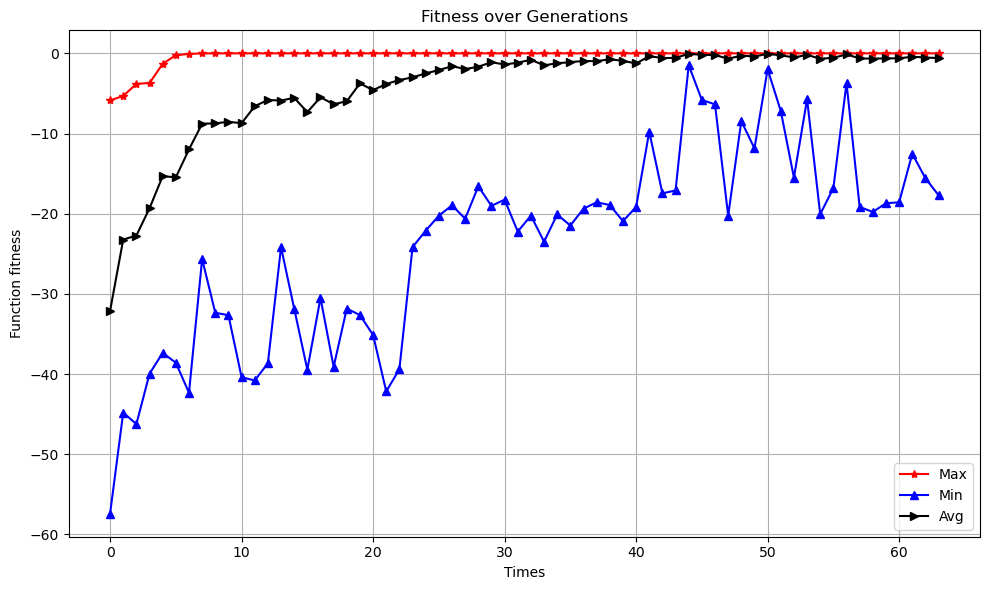

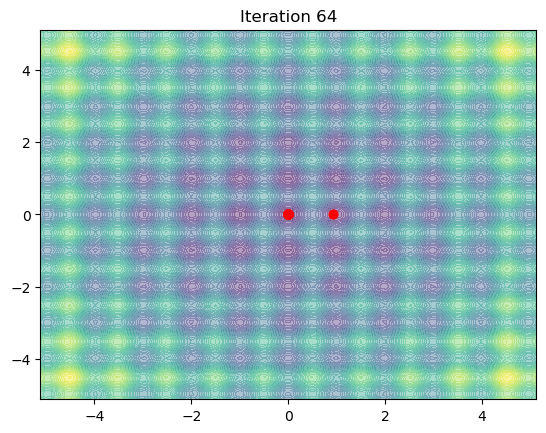

In [133]:
# Célula para a realização de testes
coordinates, y, history, best, worst, avg = PSO()

# Plota gráfico
plotGraph(best, worst, avg)

# Cria animação
animate_particles(history, "test1.mp4")

#### Teste 2 - Individualismo

C_1 = 2.5

C_2 = 0.5

Nesse caso, as partículas exploram regiões de maneira independente. Assim, há uma maior diversidade de posições e uma menor convergência

Iteração 281 | Melhor Fitness: 0.00000 | X: [-0.00015369776794080608, 3.637708905569266e-05]


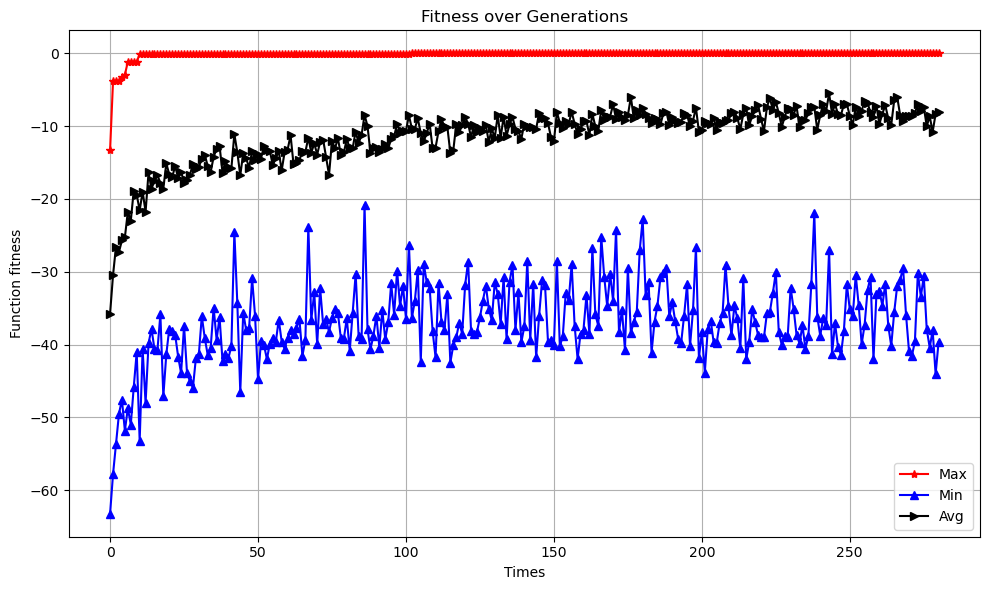

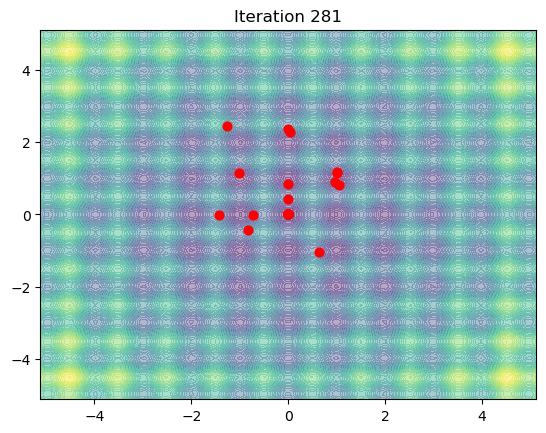

In [135]:
# Célula para a realização de testes
C_1 = 2.5
C_2 = 0.5

coordinates, y, history, best, worst, avg = PSO()

# Plota gráfico
plotGraph(best, worst, avg)

# Cria animação
animate_particles(history, "test2.mp4")



#### Teste 3 - Socialismo

C_1 = 0.5

C_2 = 2.5

Nesse caso, as partículas seguem a melhor solução rapidamente. Assim há uma convergência mais rápida e prematura. 

Iteração 70 | Melhor Fitness: 0.00000 | X: [-1.5272224558057888e-09, -1.0679226913558383e-09]


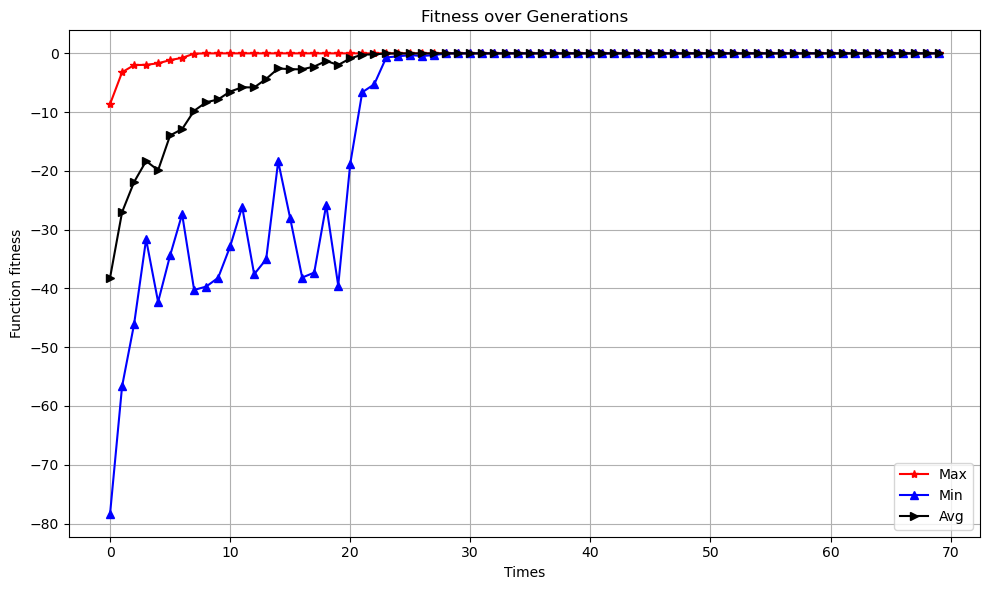

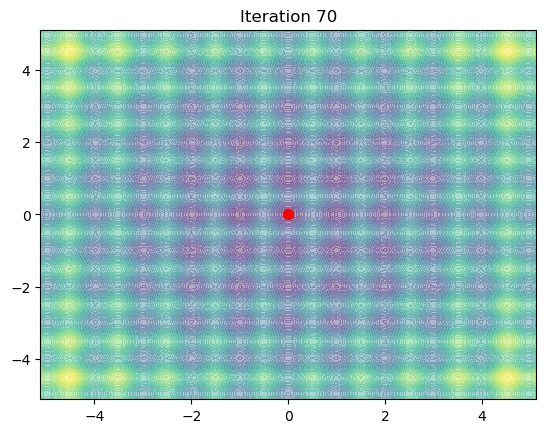

In [136]:
# Célula para a realização de testes
C_1 = 0.5
C_2 = 2.5

coordinates, y, history, best, worst, avg = PSO()

# Plota gráfico
plotGraph(best, worst, avg)

# Cria animação
animate_particles(history, "test3.mp4")
